# XAI CODE DEMO

## Explainable AI Specialization on Coursera

If you experience high latency while running this notebook, you can open it in Google Colab:

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/explainable-machine-learning/interpretable-ml/blob/main/decision_tree_interpretability.ipynb)

# Decision Trees

* Tree-based models split the data multiple times based on certain cutoff values in the features
* Different subsets of the dataset are created through this splitting, with each instance belonging to one subset
* To predict the outcome in each leaf node, the average outcome of the training data in this node is used

Terminology
* Terminal/leaf nodes: final subsets
* Internal/split nodes: intermediate subsets


## Classification and Regression Trees (CART)

#### Splitting the Data:
* The algorithm splits the data into different subsets based on feature values.
* CART determines the cutoff point for a feature that minimizes the variance (for regression) or Gini index (for classification) of the target variable
* The variance measures how spread out the target values are around the mean in a node
* The Gini index measures the impurity or class distribution in a node

#### Tree Construction:
* This process of splitting is done recursively.
* At each node, the algorithm selects the best feature and the best value of that feature to split the data, based on some criterion like the Gini impurity (for classification) or the mean squared error (for regression).

#### Stopping Criteria:
* The recursive splitting continues until a stopping criterion is met

#### Assigning Predictions:
* Once the tree is constructed, each leaf node Rm​ contains a subset of the training instances.
* For regression trees, the predicted value y^ for an instance x that falls into the leaf node Rm​ is the average of the target values of the training instances in Rm​.

#### Interpreting CART
* If your instance lies in the subset (leaf node), the predicted outcome is the mean value of y of the instances in that node
* For all the splits for which the feature was used, measure how much it has reduced the variance or Gini index compared to the parent node.
* The sum of all importances is scaled to 100, so each importance can be interpreted as share of the overall model importance



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

#### Dataset

We will be using the Diabetes datastet for this demonstration: [LINK](https://www.geeksforgeeks.org/sklearn-diabetes-dataset/)

This dataset is from [Efron, et.al.](https://hastie.su.domains/Papers/LARS/LeastAngle_2002.pdf)

The features in this dataset are age, sex, bmi, blood pressure (bp), and six serum measurements (s1-s6).

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Model

In [3]:
# Train a Decision Tree regressor (CART)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Visualize decision tree

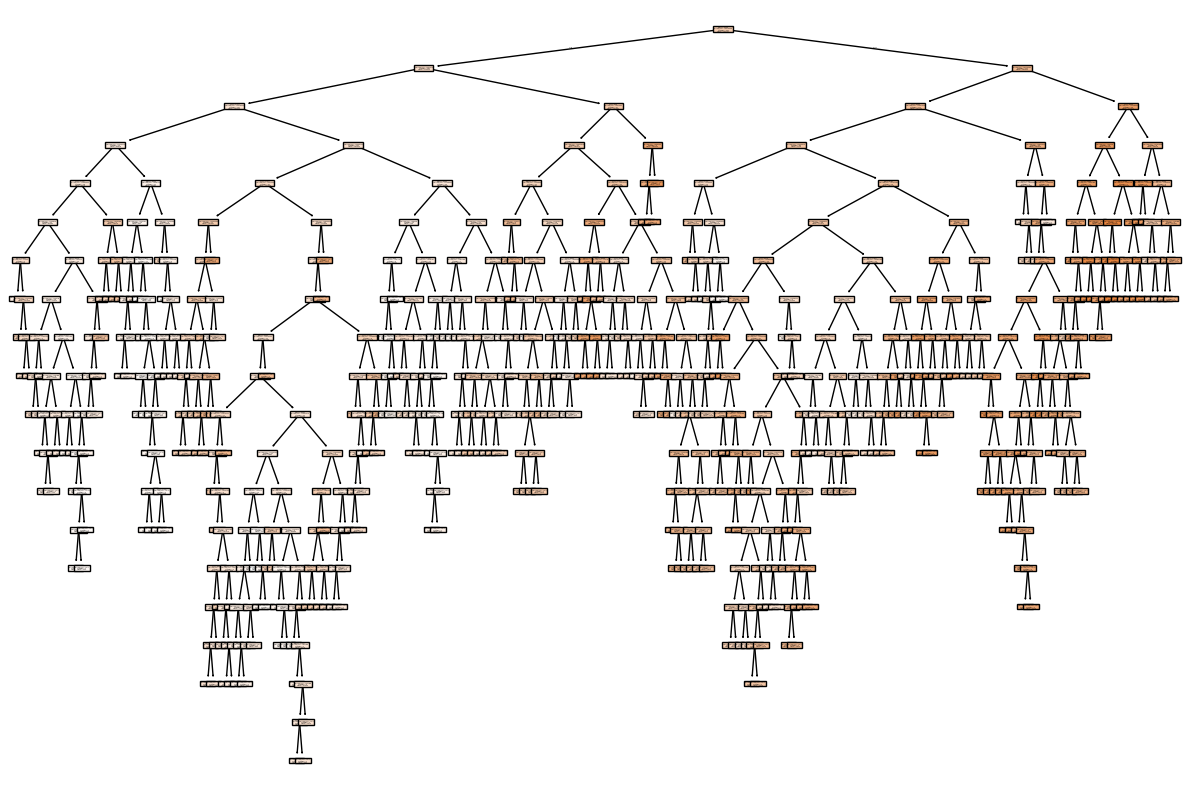

In [4]:
# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(regressor, filled=True, feature_names=diabetes.feature_names)
plt.show()

In [5]:
print("Feature importance:")
for feature_name, importance in zip(diabetes.feature_names, regressor.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")

Feature importance:
age: 0.0658
sex: 0.0057
bmi: 0.4171
bp: 0.0740
s1: 0.0810
s2: 0.0400
s3: 0.0604
s4: 0.0452
s5: 0.1567
s6: 0.0540


### Pruning

Pruning helps mitigate overfitting

In [6]:
# Train a pruned Decision Tree regressor
pruned_regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=5, min_samples_leaf=5)
pruned_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=5)

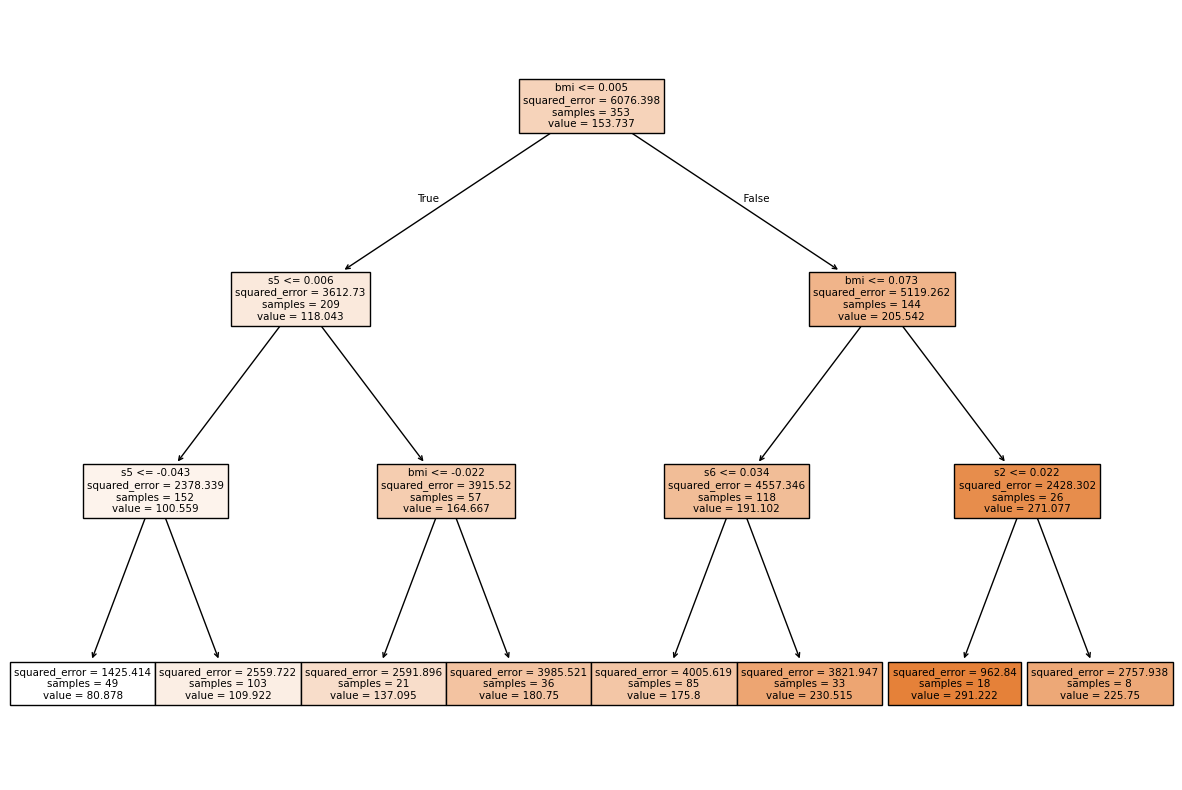

In [7]:
# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_regressor, filled=True, feature_names=diabetes.feature_names)
plt.show()

In [8]:
print("Pruned Tree Feature importance:")
for feature_name, importance in zip(diabetes.feature_names, pruned_regressor.feature_importances_):
    print(f"{feature_name}: {importance:.4f}")

Pruned Tree Feature importance:
age: 0.0000
sex: 0.0000
bmi: 0.7352
bp: 0.0000
s1: 0.0000
s2: 0.0214
s3: 0.0000
s4: 0.0000
s5: 0.1791
s6: 0.0643


### Trace decision path of single instance

In [9]:
# Example prediction
X_test_reset = X_test.reset_index(drop=True)
sample = X_test_reset.iloc[0].values.reshape(1, -1)
prediction = pruned_regressor.predict(sample)

# Trace decision path
node_indicator = pruned_regressor.decision_path(sample)
leaf_id = pruned_regressor.apply(sample)

# Print decision path
print(f"Prediction: {prediction}")
print(f"Decision path: {node_indicator.indices}")
print(f"Leaf id: {leaf_id}")

Prediction: [180.75]
Decision path: [0 1 5 7]
Leaf id: [7]
